<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/5.%20Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part One: Image data augmentation

Aim: Construct own convolutional neural network, train the network with CIFAR10 dataset, then
test the classification result of the implementation of horizontal and vertical flip augmentation
technique on “dog.jpg” image.
CIFAR10 database link: https://www.cs.toronto.edu/~kriz/cifar.html

Epoch 1/10
782/782 [==============================] - 83s 105ms/step - loss: 1.5771 - accuracy: 0.4228 - val_loss: 1.3061 - val_accuracy: 0.5309
Epoch 2/10
782/782 [==============================] - 84s 107ms/step - loss: 1.2219 - accuracy: 0.5646 - val_loss: 1.1574 - val_accuracy: 0.5886
Epoch 3/10
782/782 [==============================] - 90s 115ms/step - loss: 1.0807 - accuracy: 0.6214 - val_loss: 1.0780 - val_accuracy: 0.6197
Epoch 4/10
782/782 [==============================] - 90s 115ms/step - loss: 0.9859 - accuracy: 0.6548 - val_loss: 0.9953 - val_accuracy: 0.6504
Epoch 5/10
782/782 [==============================] - 84s 107ms/step - loss: 0.9042 - accuracy: 0.6841 - val_loss: 0.9372 - val_accuracy: 0.6749
Epoch 6/10
782/782 [==============================] - 85s 109ms/step - loss: 0.8396 - accuracy: 0.7070 - val_loss: 0.9647 - val_accuracy: 0.6738
Epoch 7/10
782/782 [==============================] - 81s 103ms/step - loss: 0.7969 - accuracy: 0.7208 - val_loss: 0.9116 - val_ac

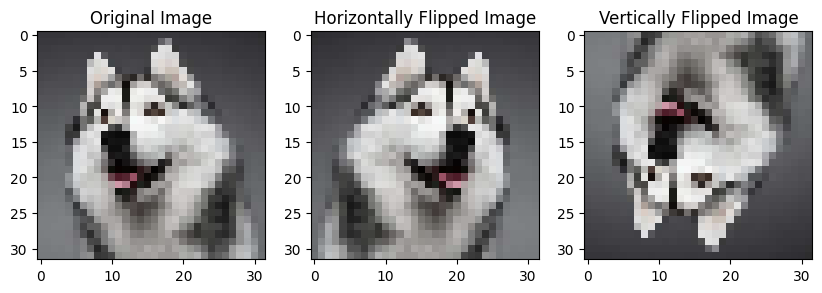

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Construct the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)

# Test the classification result on the "dog.jpg" image with augmentation
img_path = '/content/dog.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Perform horizontal flip augmentation
img_horizontal_flip = tf.image.flip_left_right(img_array)

# Perform vertical flip augmentation
img_vertical_flip = tf.image.flip_up_down(img_array)

# Predict the class labels for the original, horizontally flipped, and vertically flipped images
original_prediction = model.predict(img_array)
horizontal_flip_prediction = model.predict(img_horizontal_flip)
vertical_flip_prediction = model.predict(img_vertical_flip)

# Display the predictions
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Original Image Prediction:", class_labels[np.argmax(original_prediction)])
print("Horizontally Flipped Image Prediction:", class_labels[np.argmax(horizontal_flip_prediction)])
print("Vertically Flipped Image Prediction:", class_labels[np.argmax(vertical_flip_prediction)])

# Display the original, horizontally flipped, and vertically flipped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array[0])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(tf.image.flip_left_right(img_array)[0])
plt.title('Horizontally Flipped Image')

plt.subplot(1, 3, 3)
plt.imshow(tf.image.flip_up_down(img_array)[0])
plt.title('Vertically Flipped Image')

plt.show()


Part Two: Image Data Augmentation

Aim: Construct own convolutional neural network, train the network with MNIST dataset, then test
the classification result of the implementation of rotation augmentation technique on
“handwritten6.jpg” image.
MNIST database link: http://yann.lecun.com/exdb/mnist/

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 72s 75ms/step - loss: 0.1879 - accuracy: 0.9439 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 2/10
938/938 [==============================] - 70s 75ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 3/10
938/938 [==============================] - 66s 71ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 5/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0257 - val_accuracy: 0.9913
Epoch 6/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 66s 70ms/step - l

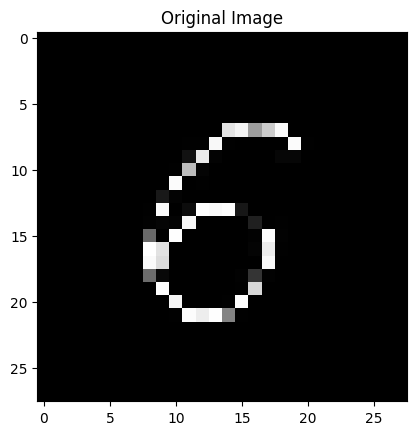

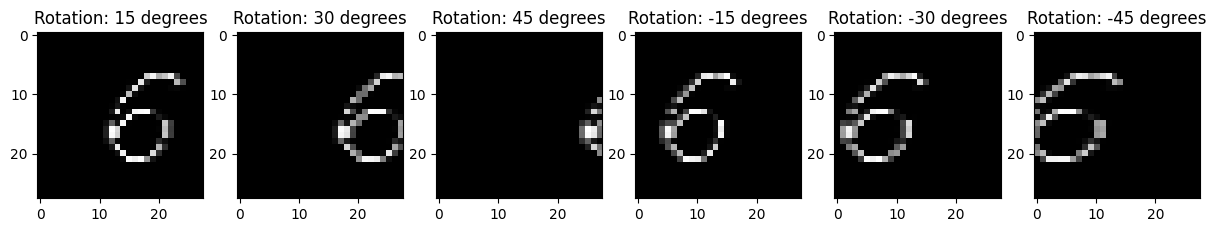

1/1 [==============================] - 0s 26ms/step
Original Image Prediction: 5
Rotation 15 degrees Prediction: 5
Rotation 30 degrees Prediction: 1
Rotation 45 degrees Prediction: 1
Rotation -15 degrees Prediction: 8
Rotation -30 degrees Prediction: 8
Rotation -45 degrees Prediction: 7


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construct the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)

# Load and preprocess the image for testing
img_path = '/content/handwritten6.jpg'

img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Display the original image
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title('Original Image')
plt.show()

# Perform rotation augmentation
rotated_images = []
angles = [15, 30, 45, -15, -30, -45]

for angle in angles:
    rotated_img = tf.keras.preprocessing.image.apply_affine_transform(img_array[0], theta=angle)
    rotated_images.append(rotated_img)

# Display the rotated images
plt.figure(figsize=(15, 3))
for i, rotated_img in enumerate(rotated_images):
    plt.subplot(1, 6, i + 1)
    plt.imshow(rotated_img, cmap='gray')
    plt.title(f'Rotation: {angles[i]} degrees')

plt.show()

# Predict the class labels for the original and rotated images
original_prediction = model.predict(img_array)
rotated_predictions = [model.predict(np.expand_dims(rotated_img, axis=0)) for rotated_img in rotated_images]

# Display the predictions
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print("Original Image Prediction:", class_labels[np.argmax(original_prediction)])
for i, rotated_pred in enumerate(rotated_predictions):
    print(f"Rotation {angles[i]} degrees Prediction:", class_labels[np.argmax(rotated_pred)])
